In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = ['peter', 'paul', 'mary']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary']

In [ ]:
names = pd.Series(data)
names

,0
0,peter
1,paul
2,mary


In [ ]:
names.str.capitalize()

,0
0,Peter
1,Paul
2,Mary


In [ ]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [ ]:
monte.str.lower()

,0
0,graham chapman
1,john cleese
2,terry gilliam
3,eric idle
4,terry jones
5,michael palin


In [ ]:
obj = monte.str

In [ ]:
obj.lower()

,0
0,graham chapman
1,john cleese
2,terry gilliam
3,eric idle
4,terry jones
5,michael palin


In [ ]:
obj.len()

,0
0,14
1,11
2,13
3,9
4,11
5,13


In [ ]:
obj.startswith('T')

,0
0,False
1,False
2,True
3,False
4,True
5,False


In [ ]:
obj.split()

,0
0,"[Graham, Chapman]"
1,"[John, Cleese]"
2,"[Terry, Gilliam]"
3,"[Eric, Idle]"
4,"[Terry, Jones]"
5,"[Michael, Palin]"


In [ ]:
monte.str[0:3]

,0
0,Gra
1,Joh
2,Ter
3,Eri
4,Ter
5,Mic


In [ ]:
monte.str.slice(0, 3)

,0
0,Gra
1,Joh
2,Ter
3,Eri
4,Ter
5,Mic


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
! git clone https://github.com/jakevdp/open-recipe-data

fatal: destination path 'open-recipe-data' already exists and is not an empty directory.


In [ ]:
df = pd.read_json("/content/open-recipe-data/recipeitems.json.gz", lines=True, compression='gzip')

In [ ]:
df.shape

(173278, 17)

In [ ]:
df.head()

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.ingredients.str.len().describe()

,ingredients
count,173278.000000
mean,244.617926
std,146.705285
min,0.000000
25%,147.000000
50%,221.000000
75%,314.000000
max,9067.000000


In [ ]:
df.name[np.argmax(df.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [ ]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [ ]:
import re
spice_df = pd.DataFrame(dict((spice, df.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))

In [ ]:
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
selection = spice_df.query('parsley & paprika & tarragon')

In [ ]:
len(selection)

10

In [ ]:
selection

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
2069,False,True,False,False,True,False,True,False,True,False
74964,False,False,False,False,True,False,True,False,True,False
93768,True,True,False,True,True,False,True,False,True,False
113926,True,True,False,False,True,False,True,False,True,False
137686,True,True,False,False,True,False,True,False,True,False
140530,True,True,False,False,True,False,True,True,True,False
158475,True,True,False,False,True,False,True,False,True,True
158486,True,True,False,False,True,False,True,False,True,False
163175,True,True,True,False,True,False,True,False,True,False
165243,True,True,False,False,True,False,True,False,True,False


In [ ]:
df.name[selection.index]

,name
2069,"All cremat with a Little Gem, dandelion and wa..."
74964,Lobster with Thermidor butter
93768,Burton's Southern Fried Chicken with White Gravy
113926,Mijo's Slow Cooker Shredded Beef
137686,Asparagus Soup with Poached Eggs
140530,Fried Oyster Po’boys
158475,Lamb shank tagine with herb tabbouleh
158486,Southern fried chicken in buttermilk
163175,Fried Chicken Sliders with Pickles + Slaw
165243,Bar Tartine Cauliflower Salad


In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
date.strftime('%A')

'Saturday'

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
import pandas as pd

In [ ]:
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [ ]:
date+pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
'2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)

In [ ]:
data

,0
2020-07-04,0
2020-08-04,1
2021-07-04,2
2021-08-04,3


In [ ]:
data['2020-08']

,0
2020-08-04,1


In [ ]:
data['2020-08':'2020-07']

,0


In [ ]:
data['2021']

,0
2021-07-04,2
2021-08-04,3


In [ ]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
'2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [ ]:
dates.to_period('M')

PeriodIndex(['2021-07', '2021-07', '2021-07', '2021-07', '2021-07'], dtype='period[M]')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

<ipython-input-41-c6d095693d58>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [ ]:
pd.timedelta_range(0, periods=6, freq='H')

<ipython-input-43-6fc265c1d32f>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [ ]:
from pandas_datareader import data

In [ ]:
! wget https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv

--2025-01-02 14:54:33--  https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4695437 (4.5M) [text/plain]
Saving to: ‘FremontBridge.csv’

FremontBridge.csv   100%[===================>]   4.48M  --.-KB/s    in 0.08s   

2025-01-02 14:54:33 (54.8 MB/s) - ‘FremontBridge.csv’ saved [4695437/4695437]



In [ ]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

<ipython-input-49-f97034773c8c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [ ]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [ ]:
data.shape

(147278, 3)

In [ ]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Hourly Bicycle Count')

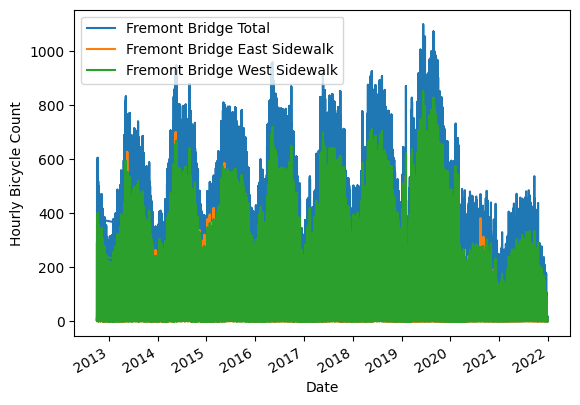

In [ ]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

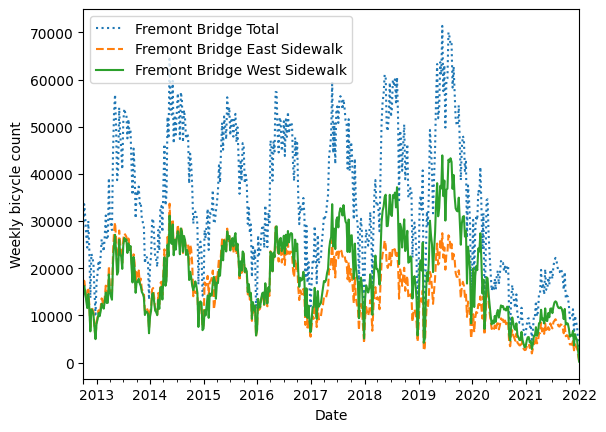

In [ ]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

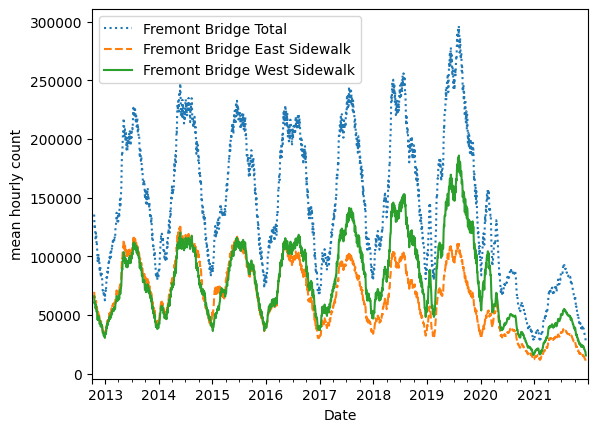

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

Text(0, 0.5, 'mean hourly count')

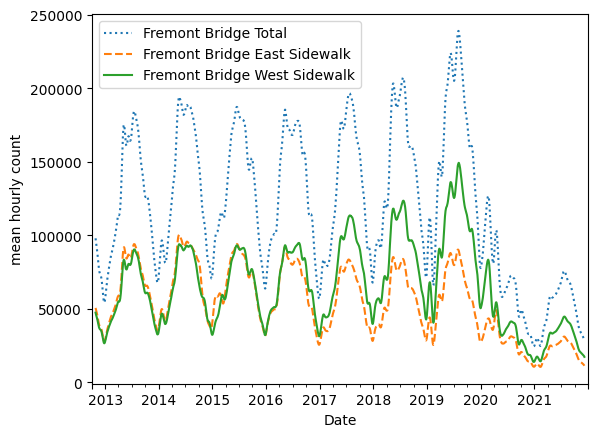

In [ ]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

<Axes: xlabel='time'>

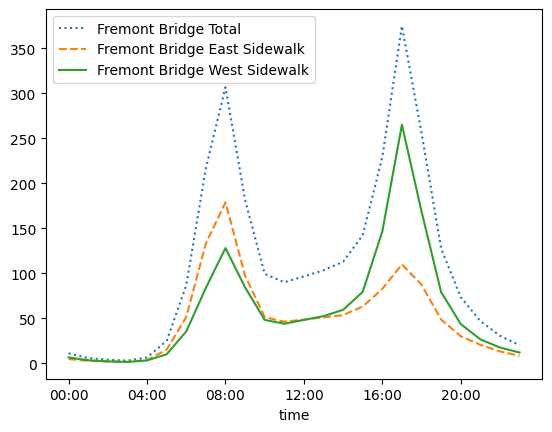

In [ ]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

<Axes: >

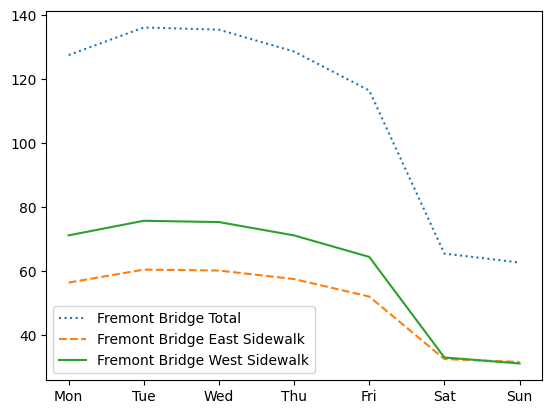

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

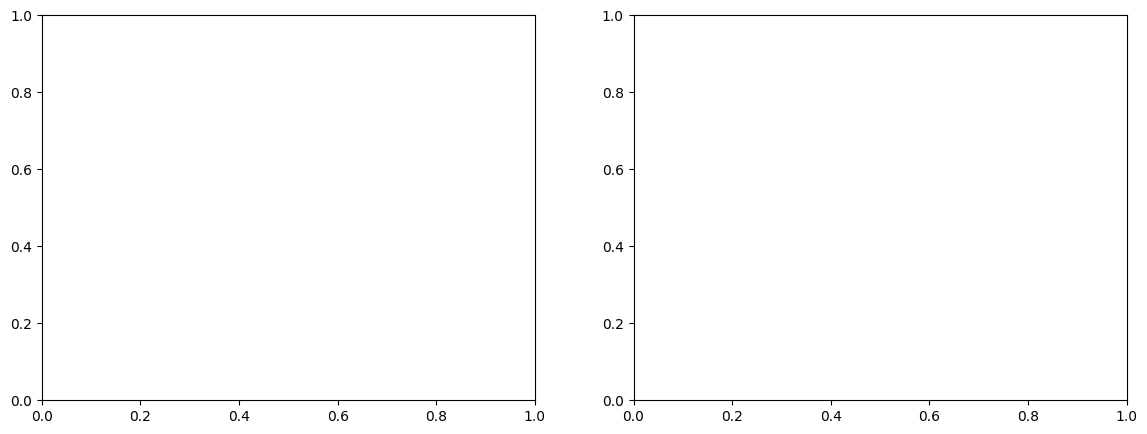

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-'])